Supplement Sales Analysis

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level. Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Data Profiling<br>
ID              (String)  : Order Unique Identity.<br>
Store_id        (Integer) : Id to represent womart store entity.<br>
Store_Type      (String)  : Type of store based on womart business strategic.<br>
Location_Type   (String)  : Type of location of each store.<br>
Region_Code     (String)  : Id of region where each store located.<br>
Date            (String)  : Day when transaction occurs on each store.<br>
Holiday         (Integer) : Is it holiday or not.<br>
Discount        (String)  : it has a discount or not.<br>
#Order          (Integer) : Number of orders.<br>
Sales           (Float)   : Total revenue of each order.<br>

Business Understanding
Setelah melalui tahapan-tahapan final project, saat ini kamu diminta untuk melakukan eksplorasi data, silakan cari actionable bisnis insight dan rekomendasi untuk improvement berdasarkan bisnis insightnya dari data yang diberikan. Pastikan hal-hal berikut ini ada dalam laporan:
1. Background:
- Peran dalam dataset (5 poin)
- Permasalahan yang ingin diselesaikan (5 poin)
- Goal yang ingin dicapai (5 poin)
- Objective yang ingin dilakukan (5 poin)
- Business metric untuk mengukur ketercapaian objective (5 poin)
2. Insight (45 poin)
3. Business recommendation (30 poin)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('train.csv')

In [10]:
df.sample(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
6311,T1006312,69,S1,L1,R4,2018-01-18,0,No,43,26718.00
86241,T1086242,280,S4,L2,R2,2018-08-25,1,Yes,103,46900.47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  object        
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  int64         
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [74]:
df['Store_id'] = df['Store_id'].astype(str)

In [75]:
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
df['Discount'] = df['Discount'].replace({'Yes': 1, 'No': 0})

In [11]:
num_cols = ['#Order','Sales','Holiday','Discount']
cat_cols = ['ID','Store_id','Store_Type','Location_Type','Region_Code']
date_cols = ['Date']

In [34]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#Order,188340.0,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
Sales,188340.0,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0
Holiday,188340.0,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
Discount,188340.0,0.447536,0.497241,0.0,0.0,0.0,1.0,1.0


In [40]:
df[cat_cols].describe().transpose()

,count,unique,top,freq
ID,188340,188340,T1000001,1
Store_id,188340,365,1,516
Store_Type,188340,4,S1,88752
Location_Type,188340,5,L1,85140
Region_Code,188340,4,R1,63984


In [13]:
df['Date'].dt.year.max()

2019

In [51]:
Acols = ['Store_Type','Location_Type','Region_Code']
df[Acols].apply(lambda x: x.value_counts()).T.stack()

Store_Type     S1    88752.0
               S2    28896.0
               S3    24768.0
               S4    45924.0
Location_Type  L1    85140.0
               L2    48504.0
               L3    29928.0
               L4    10836.0
               L5    13932.0
Region_Code    R1    63984.0
               R2    54180.0
               R3    44376.0
               R4    25800.0
dtype: float64

In [53]:
Bcols = ['Holiday', 'Discount']
df[Bcols].apply(lambda x: x.value_counts()).T.stack()

Holiday   0    163520
          1     24820
Discount  0    104051
          1     84289
dtype: int64

In [61]:
df['#Order'].nunique()

299

In [67]:
df.groupby(['Store_Type'])[['Sales', '#Order']].sum()#.reset_index()

,Sales,#Order
Store_Type,,
S1,3.343866e+09,5149577
S2,7.955308e+08,1169502
S3,1.165658e+09,1824495
S4,2.752946e+09,4702286


In [44]:
df.groupby(['Discount'])[['Sales', '#Order']].sum()#.reset_index()

,Sales,#Order
Discount,,
No,3.891890e+09,6430992
Yes,4.166110e+09,6414868


In [45]:
df.groupby(['Holiday'])[['Sales', '#Order']].sum()#.reset_index()

,Sales,#Order
Holiday,,
No,7.178085e+09,11425695
Yes,8.799156e+08,1420165


In [65]:
def remove_outliers(df, column_names):
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
        df = df.loc[filter]  
    return df

# List of column names
columns = ['Sales', '#Order']

# Remove outliers
df = remove_outliers(df, columns)

In [66]:
df.shape

(178837, 12)

In [16]:
agg_data = df.groupby('Store_Type').agg({'Sales': 'sum', '#Order': 'sum'}).reset_index()

Text(0, 0.5, 'Jumlah Pesanan')

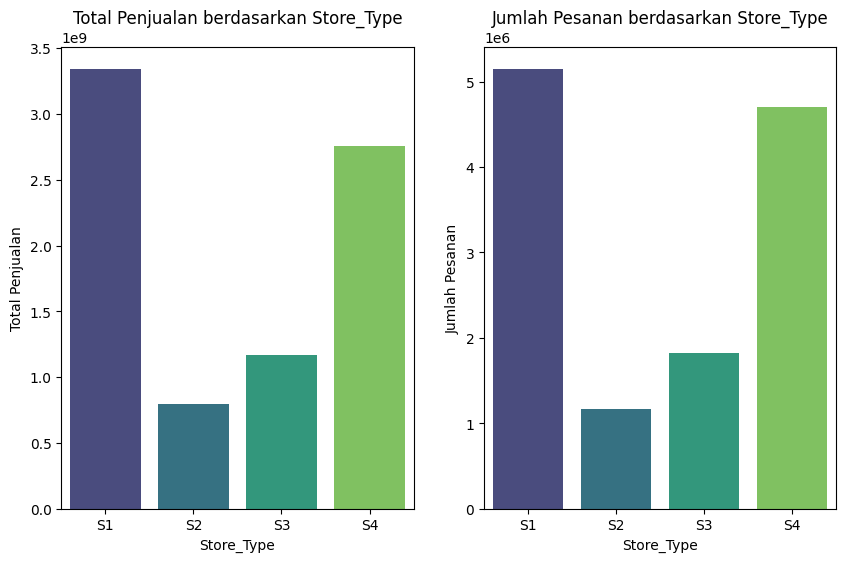

In [19]:
# Membuat bar chart yang berdampingan
plt.figure(figsize=(10, 6))

# Bar chart untuk total penjualan
plt.subplot(1, 2, 1)
sns.barplot(x='Store_Type', y='Sales', data=agg_data, palette='viridis')
plt.title('Total Penjualan berdasarkan Store_Type')
plt.xlabel('Store_Type')
plt.ylabel('Total Penjualan')

# Bar chart untuk jumlah pesanan
plt.subplot(1, 2, 2)
sns.barplot(x='Store_Type', y='#Order', data=agg_data, palette='viridis')
plt.title('Jumlah Pesanan berdasarkan Store_Type')
plt.xlabel('Store_Type')
plt.ylabel('Jumlah Pesanan')

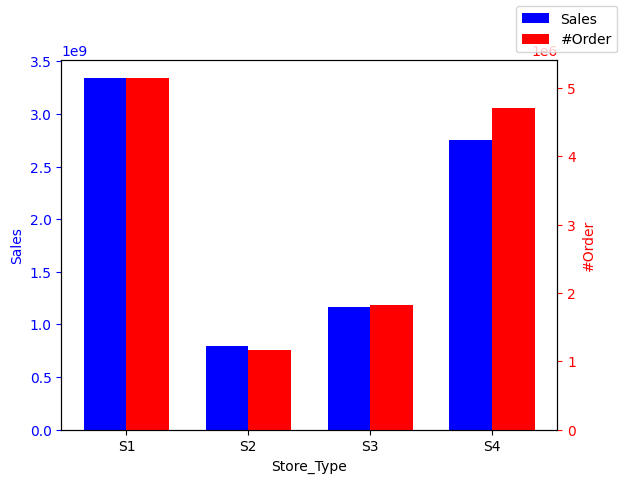

In [29]:
# Menghitung total Sales dan #Order berdasarkan Store_Type
grouped = df.groupby('Store_Type').agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Menyiapkan data untuk plot
labels = grouped['Store_Type']
sales = grouped['Sales']
orders = grouped['#Order']

x = np.arange(len(labels))  # Lokasi label
width = 0.35  # Lebar bar

fig, ax1 = plt.subplots()

# Membuat bar plot untuk 'Sales'
rects1 = ax1.bar(x - width/2, sales, width, label='Sales', color='b')
ax1.set_xlabel('Store_Type')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params('y', colors='b')

# Membuat axis kedua untuk '#Order'
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, orders, width, label='#Order', color='r')
ax2.set_ylabel('#Order', color='r')
ax2.tick_params('y', colors='r')

# Menambahkan label, judul, dan legenda
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
fig.legend(loc="upper right")

# Menampilkan plot
plt.show()

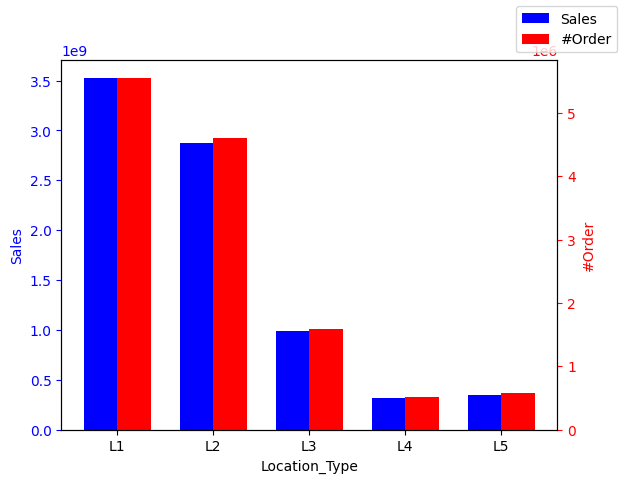

In [30]:
# Menghitung total Sales dan #Order berdasarkan Store_Type
grouped = df.groupby('Location_Type').agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Menyiapkan data untuk plot
labels = grouped['Location_Type']
sales = grouped['Sales']
orders = grouped['#Order']

x = np.arange(len(labels))  # Lokasi label
width = 0.35  # Lebar bar

fig, ax1 = plt.subplots()

# Membuat bar plot untuk 'Sales'
rects1 = ax1.bar(x - width/2, sales, width, label='Sales', color='b')
ax1.set_xlabel('Location_Type')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params('y', colors='b')

# Membuat axis kedua untuk '#Order'
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, orders, width, label='#Order', color='r')
ax2.set_ylabel('#Order', color='r')
ax2.tick_params('y', colors='r')

# Menambahkan label, judul, dan legenda
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
fig.legend(loc="upper right")

# Menampilkan plot
plt.show()

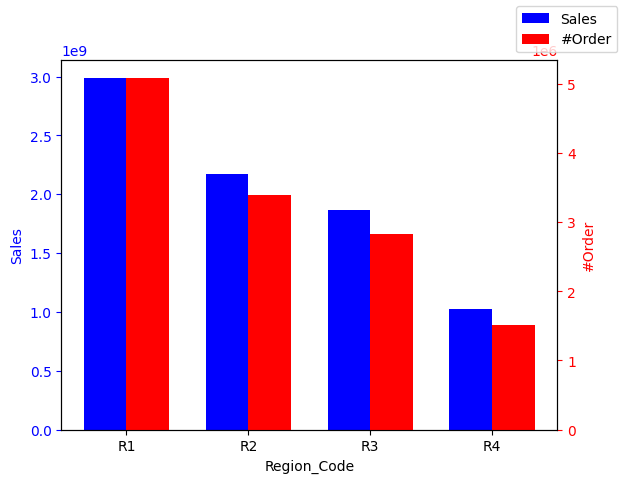

In [31]:
# Menghitung total Sales dan #Order berdasarkan Store_Type
grouped = df.groupby('Region_Code').agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Menyiapkan data untuk plot
labels = grouped['Region_Code']
sales = grouped['Sales']
orders = grouped['#Order']

x = np.arange(len(labels))  # Lokasi label
width = 0.35  # Lebar bar

fig, ax1 = plt.subplots()

# Membuat bar plot untuk 'Sales'
rects1 = ax1.bar(x - width/2, sales, width, label='Sales', color='b')
ax1.set_xlabel('Region_Code')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params('y', colors='b')

# Membuat axis kedua untuk '#Order'
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, orders, width, label='#Order', color='r')
ax2.set_ylabel('#Order', color='r')
ax2.tick_params('y', colors='r')

# Menambahkan label, judul, dan legenda
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
fig.legend(loc="upper right")

# Menampilkan plot
plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

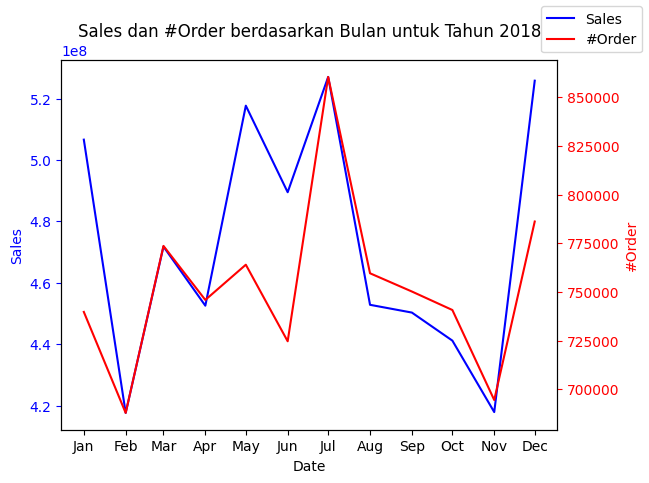

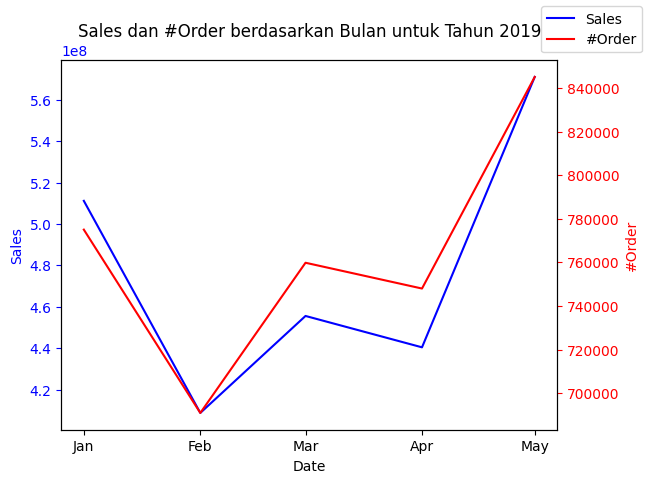

In [77]:
# Mengelompokkan data berdasarkan bulan dan menghitung total Sales dan #Order
grouped = df.groupby([df['Date'].dt.year.rename('Year'), df['Date'].dt.month.rename('Month')]).agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Mengubah 'Year' dan 'Month' kembali menjadi format datetime
grouped['Date'] = pd.to_datetime(grouped[['Year', 'Month']].assign(day=1))

# Membuat plot untuk tahun 2018 dan 2019 secara terpisah
for year in [2018, 2019]:
    temp_df = grouped[grouped['Date'].dt.year == year]
    
    fig, ax1 = plt.subplots()

    # Membuat line plot untuk 'Sales'
    ax1.plot(temp_df['Date'], temp_df['Sales'], label='Sales', color='b')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Sales', color='b')
    ax1.tick_params('y', colors='b')

    # Membuat axis kedua untuk '#Order'
    ax2 = ax1.twinx()
    ax2.plot(temp_df['Date'], temp_df['#Order'], label='#Order', color='r')
    ax2.set_ylabel('#Order', color='r')
    ax2.tick_params('y', colors='r')

    # Menambahkan legenda
    fig.legend(loc="upper right")

    # Menyetel format tanggal pada sumbu x
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Menampilkan plot
    plt.title(f'Sales dan #Order berdasarkan Bulan untuk Tahun {year}')
    plt.show()

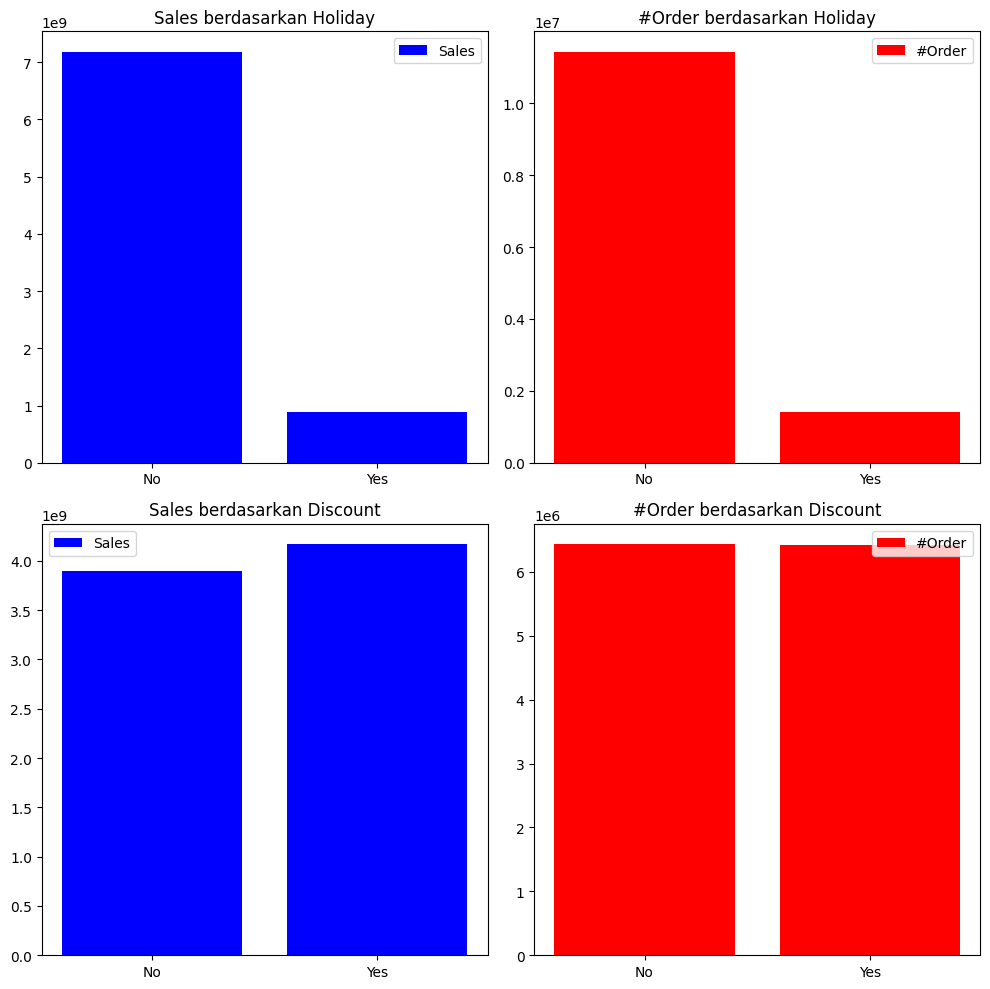

In [78]:
# Mengubah 0 dan 1 menjadi 'No' dan 'Yes' di kolom 'Holiday' dan 'Discount'
df['Holiday'] = df['Holiday'].map({0: 'No', 1: 'Yes'})
df['Discount'] = df['Discount'].map({0: 'No', 1: 'Yes'})

# Mengelompokkan data berdasarkan 'Holiday' dan 'Discount' dan menghitung total Sales dan #Order
grouped_holiday = df.groupby('Holiday').agg({'Sales':'sum', '#Order':'sum'}).reset_index()
grouped_discount = df.groupby('Discount').agg({'Sales':'sum', '#Order':'sum'}).reset_index()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Membuat bar plot untuk Sales dan #Order berdasarkan 'Holiday'
axs[0, 0].bar(grouped_holiday['Holiday'], grouped_holiday['Sales'], color='b', label='Sales')
axs[0, 0].set_title('Sales berdasarkan Holiday')
axs[0, 0].legend()

axs[0, 1].bar(grouped_holiday['Holiday'], grouped_holiday['#Order'], color='r', label='#Order')
axs[0, 1].set_title('#Order berdasarkan Holiday')
axs[0, 1].legend()

# Membuat bar plot untuk Sales dan #Order berdasarkan 'Discount'
axs[1, 0].bar(grouped_discount['Discount'], grouped_discount['Sales'], color='b', label='Sales')
axs[1, 0].set_title('Sales berdasarkan Discount')
axs[1, 0].legend()

axs[1, 1].bar(grouped_discount['Discount'], grouped_discount['#Order'], color='r', label='#Order')
axs[1, 1].set_title('#Order berdasarkan Discount')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

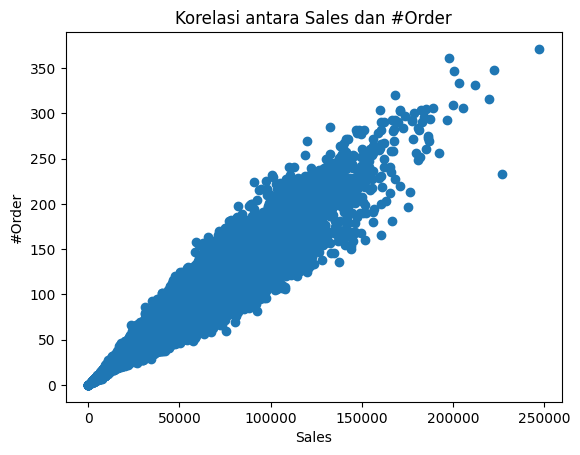

In [79]:
# Membuat scatter plot
plt.scatter(df['Sales'], df['#Order'])

# Menambahkan label dan judul
plt.xlabel('Sales')
plt.ylabel('#Order')
plt.title('Korelasi antara Sales dan #Order')

# Menampilkan plot
plt.show()

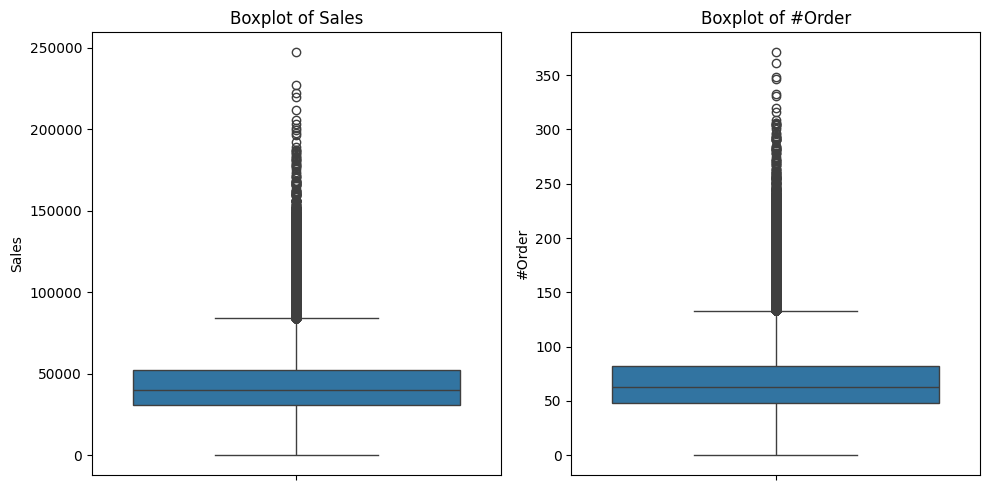

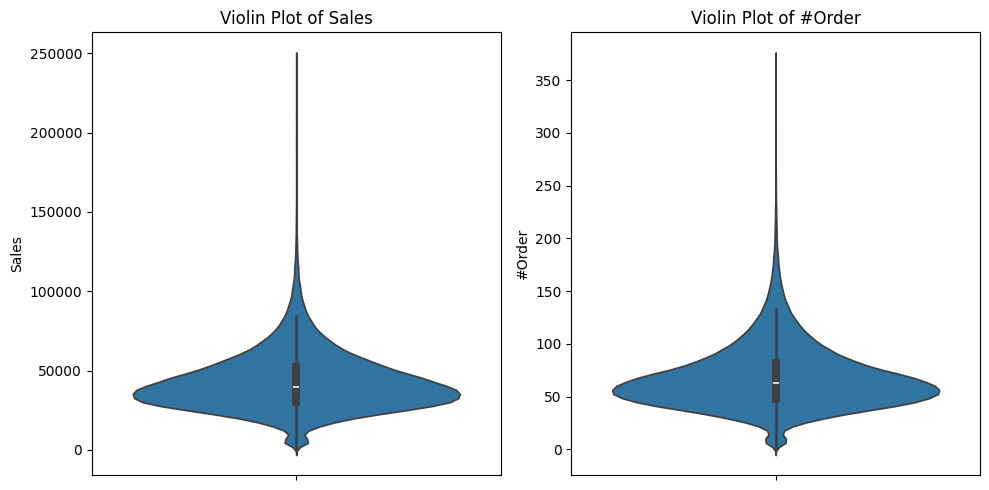

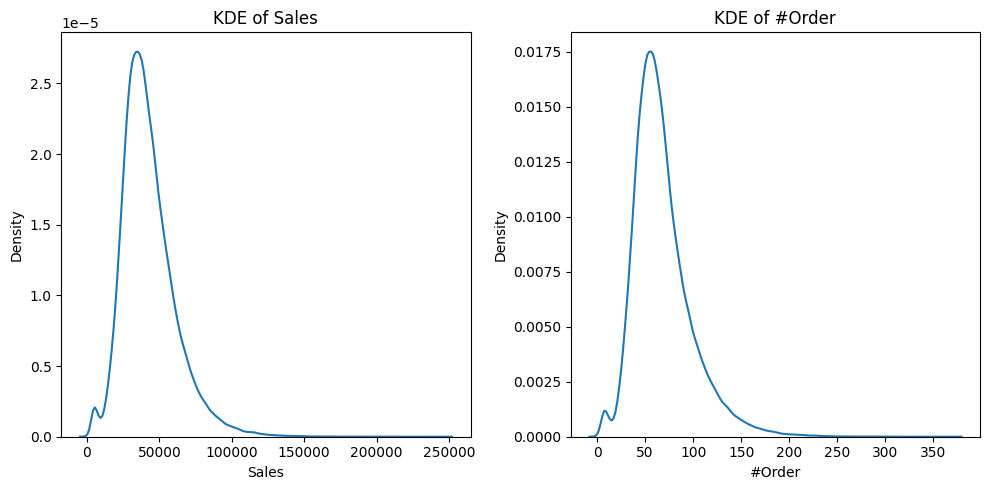

In [48]:
#Sebelum di remove outlier

# Membuat boxplot untuk 'Sales' dan '#Order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Sales')
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='#Order')
plt.title('Boxplot of #Order')

plt.tight_layout()
plt.show()

# Membuat violin plot untuk 'Sales' dan '#Order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='Sales')
plt.title('Violin Plot of Sales')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='#Order')
plt.title('Violin Plot of #Order')

plt.tight_layout()
plt.show()

# Membuat KDE untuk 'Sales' dan '#Order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Sales')
plt.title('KDE of Sales')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='#Order')
plt.title('KDE of #Order')

plt.tight_layout()
plt.show()

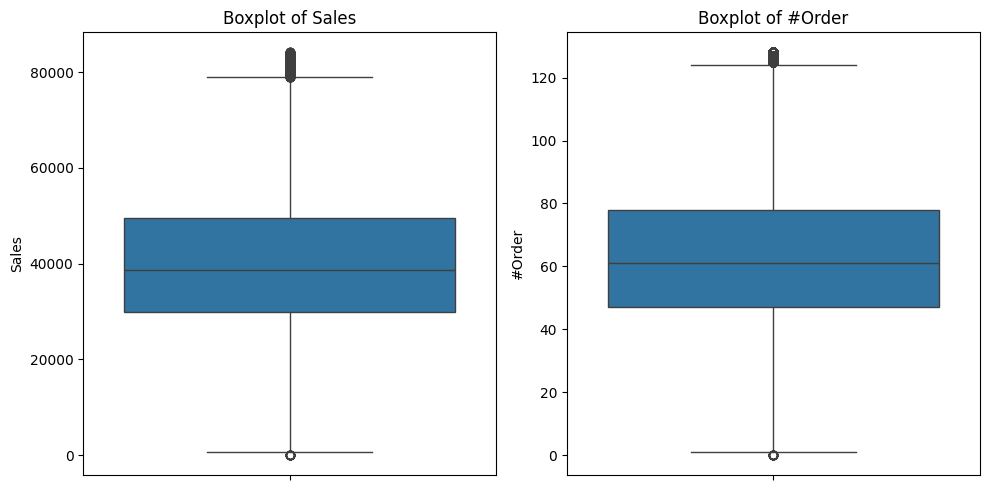

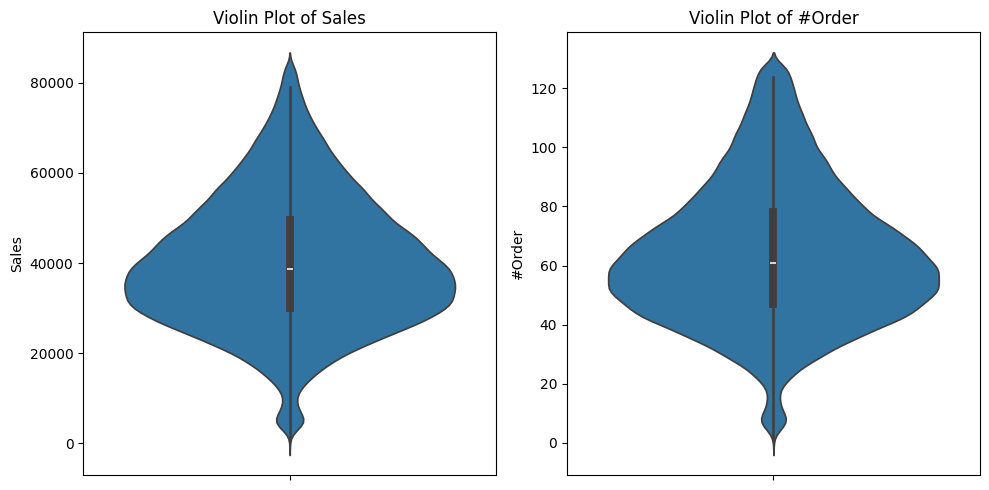

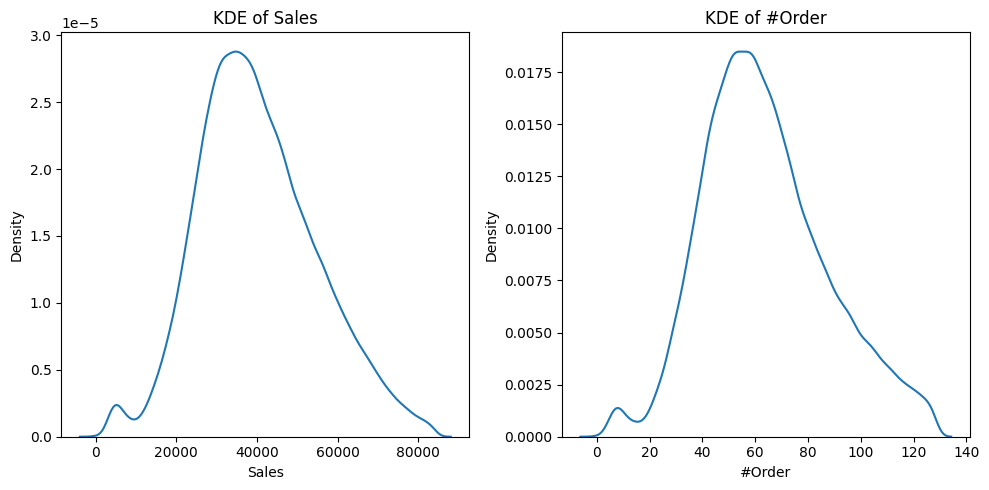

In [67]:
#Sebelum di remove outlier

# Membuat boxplot untuk 'Sales' dan '#Order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Sales')
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='#Order')
plt.title('Boxplot of #Order')

plt.tight_layout()
plt.show()

# Membuat violin plot untuk 'Sales' dan '#Order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='Sales')
plt.title('Violin Plot of Sales')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='#Order')
plt.title('Violin Plot of #Order')

plt.tight_layout()
plt.show()

# Membuat KDE untuk 'Sales' dan '#Order'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Sales')
plt.title('KDE of Sales')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='#Order')
plt.title('KDE of #Order')

plt.tight_layout()
plt.show()

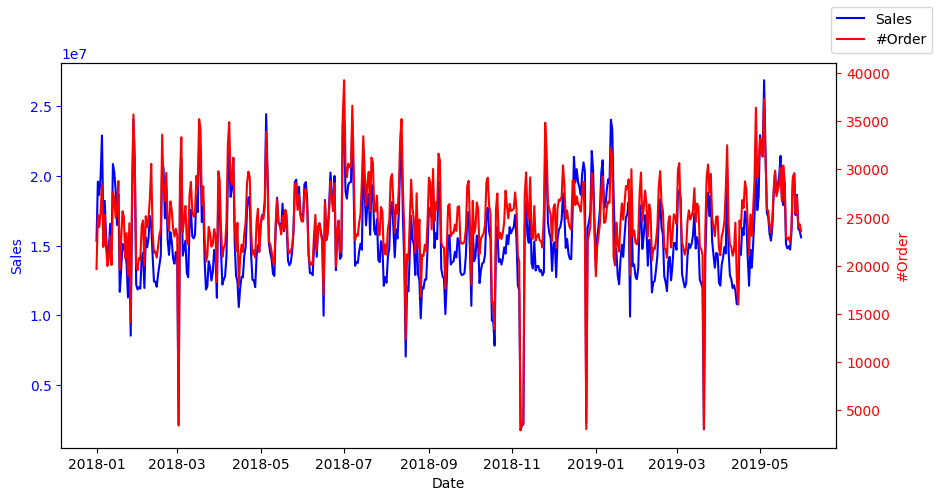

In [50]:
# Mengelompokkan data berdasarkan 'Date' dan menghitung total Sales dan #Order
grouped = df.groupby('Date').agg({'Sales':'sum', '#Order':'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Membuat line plot untuk 'Sales'
ax1.plot(grouped['Date'], grouped['Sales'], label='Sales', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params('y', colors='b')

# Membuat axis kedua untuk '#Order'
ax2 = ax1.twinx()
ax2.plot(grouped['Date'], grouped['#Order'], label='#Order', color='r')
ax2.set_ylabel('#Order', color='r')
ax2.tick_params('y', colors='r')

# Menambahkan legenda
fig.legend(loc="upper right")

# Menampilkan plot
plt.show()

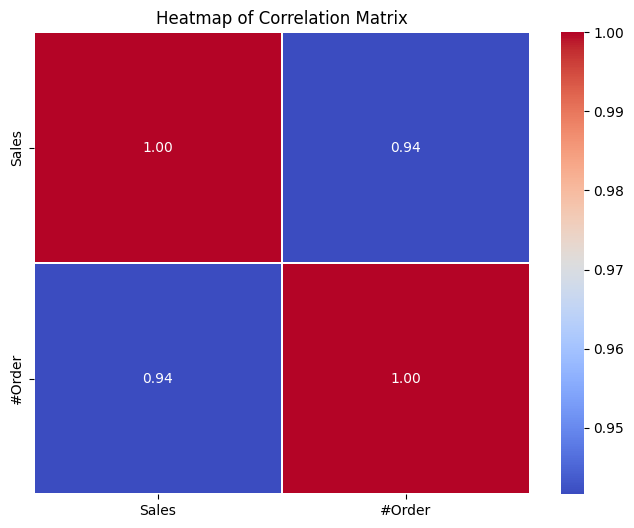

In [57]:
# Menghitung matriks korelasi
corr_matrix = df[['Sales', '#Order']].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

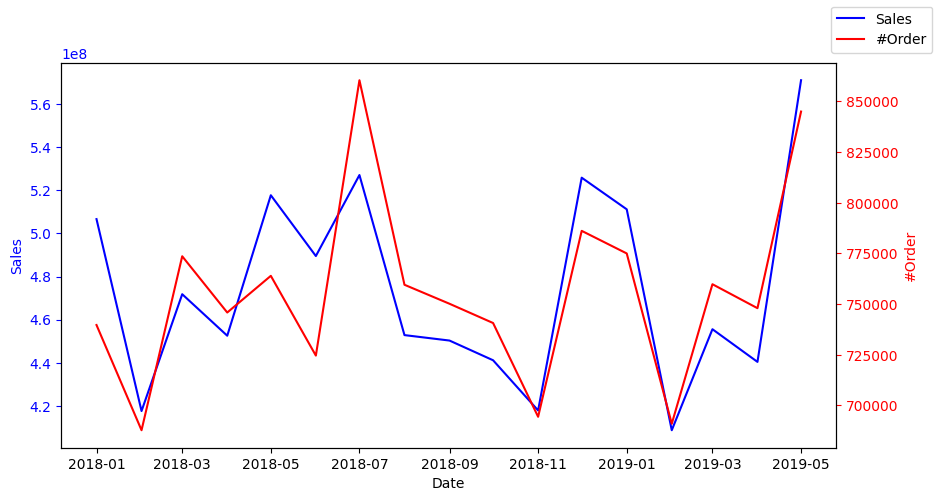

In [59]:
# Mengelompokkan data berdasarkan bulan dan menghitung total Sales dan #Order
grouped = df.groupby(df['Date'].dt.to_period('M')).agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Mengubah 'Date' kembali menjadi format datetime
grouped['Date'] = grouped['Date'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Membuat line plot untuk 'Sales'
ax1.plot(grouped['Date'], grouped['Sales'], label='Sales', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params('y', colors='b')

# Membuat axis kedua untuk '#Order'
ax2 = ax1.twinx()
ax2.plot(grouped['Date'], grouped['#Order'], label='#Order', color='r')
ax2.set_ylabel('#Order', color='r')
ax2.tick_params('y', colors='r')

# Menambahkan legenda
fig.legend(loc="upper right")

# Menampilkan plot
plt.show()

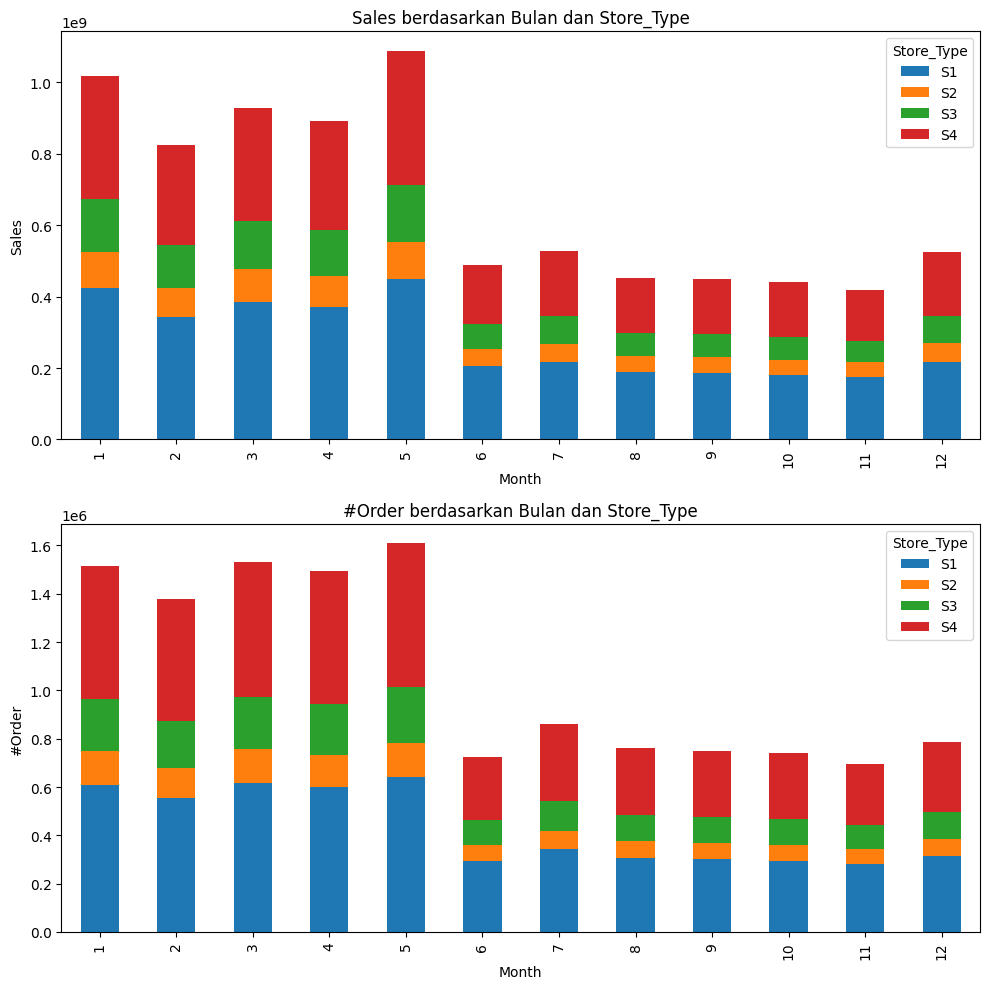

In [61]:
# Mengubah kolom 'Date' menjadi datetime dan ekstrak bulan
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Mengelompokkan data berdasarkan 'Month' dan 'Store_Type', dan menghitung total Sales dan #Order
grouped = df.groupby(['Month', 'Store_Type']).agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Pivot data untuk membuat stacked bar chart
pivot_sales = grouped.pivot(index='Month', columns='Store_Type', values='Sales')
pivot_orders = grouped.pivot(index='Month', columns='Store_Type', values='#Order')

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Membuat stacked bar chart untuk 'Sales'
pivot_sales.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Sales berdasarkan Bulan dan Store_Type')
ax[0].set_ylabel('Sales')

# Membuat stacked bar chart untuk '#Order'
pivot_orders.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('#Order berdasarkan Bulan dan Store_Type')
ax[1].set_ylabel('#Order')

plt.tight_layout()
plt.show()

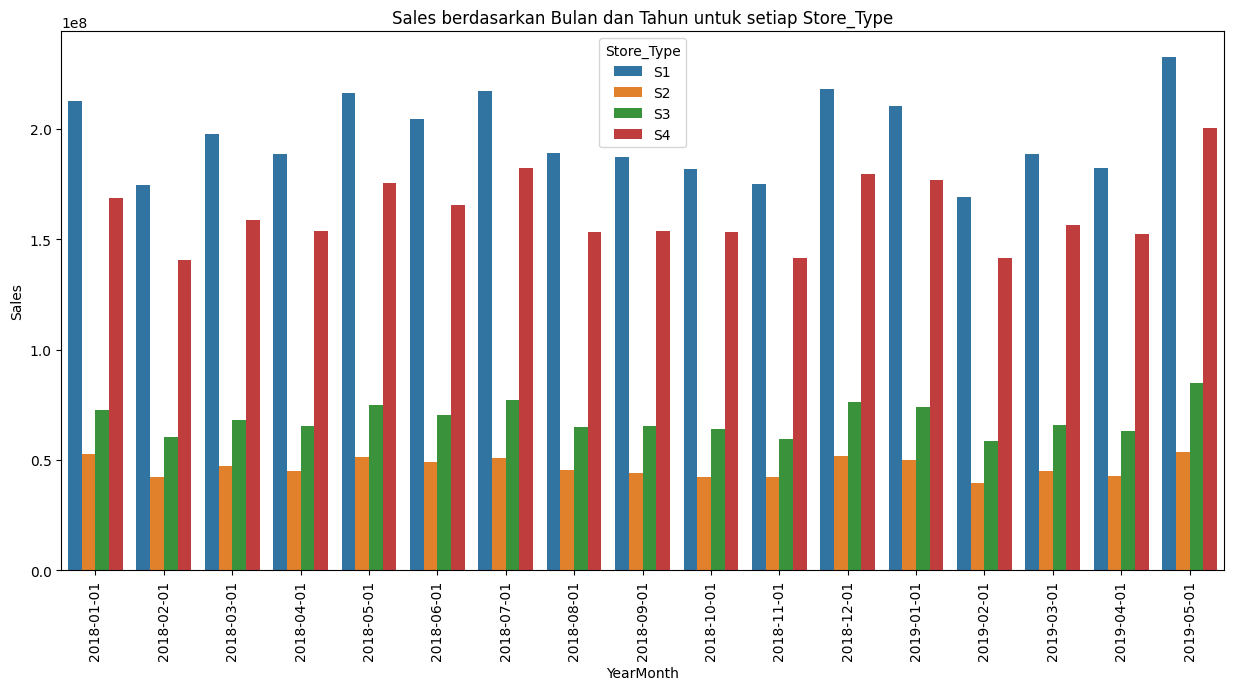

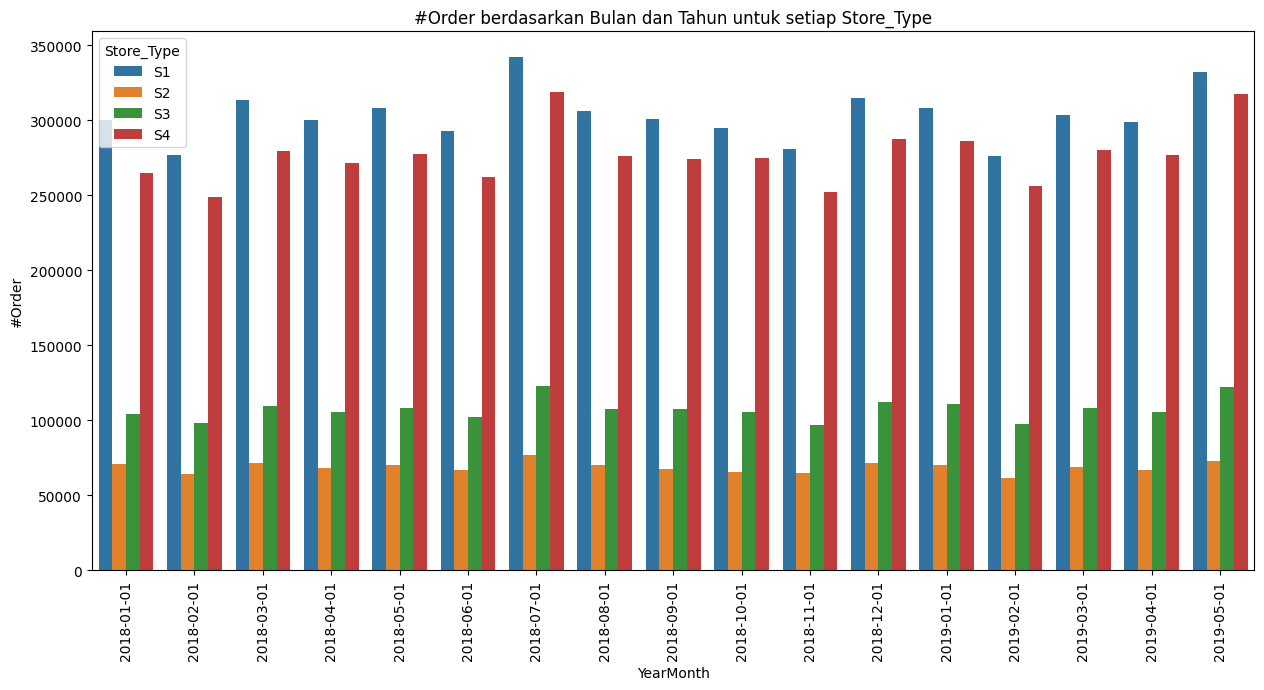

In [62]:
# Mengubah kolom 'Date' menjadi datetime dan ekstrak bulan dan tahun
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Mengelompokkan data berdasarkan 'YearMonth' dan 'Store_Type', dan menghitung total Sales dan #Order
grouped = df.groupby(['YearMonth', 'Store_Type']).agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Mengubah 'YearMonth' kembali menjadi format datetime
grouped['YearMonth'] = grouped['YearMonth'].dt.to_timestamp()

# Membuat bar chart dengan bar yang berdampingan untuk 'Sales'
plt.figure(figsize=(15, 7))
sns.barplot(x='YearMonth', y='Sales', hue='Store_Type', data=grouped)
plt.title('Sales berdasarkan Bulan dan Tahun untuk setiap Store_Type')
plt.xticks(rotation=90)
plt.show()

# Membuat bar chart dengan bar yang berdampingan untuk '#Order'
plt.figure(figsize=(15, 7))
sns.barplot(x='YearMonth', y='#Order', hue='Store_Type', data=grouped)
plt.title('#Order berdasarkan Bulan dan Tahun untuk setiap Store_Type')
plt.xticks(rotation=90)
plt.show()

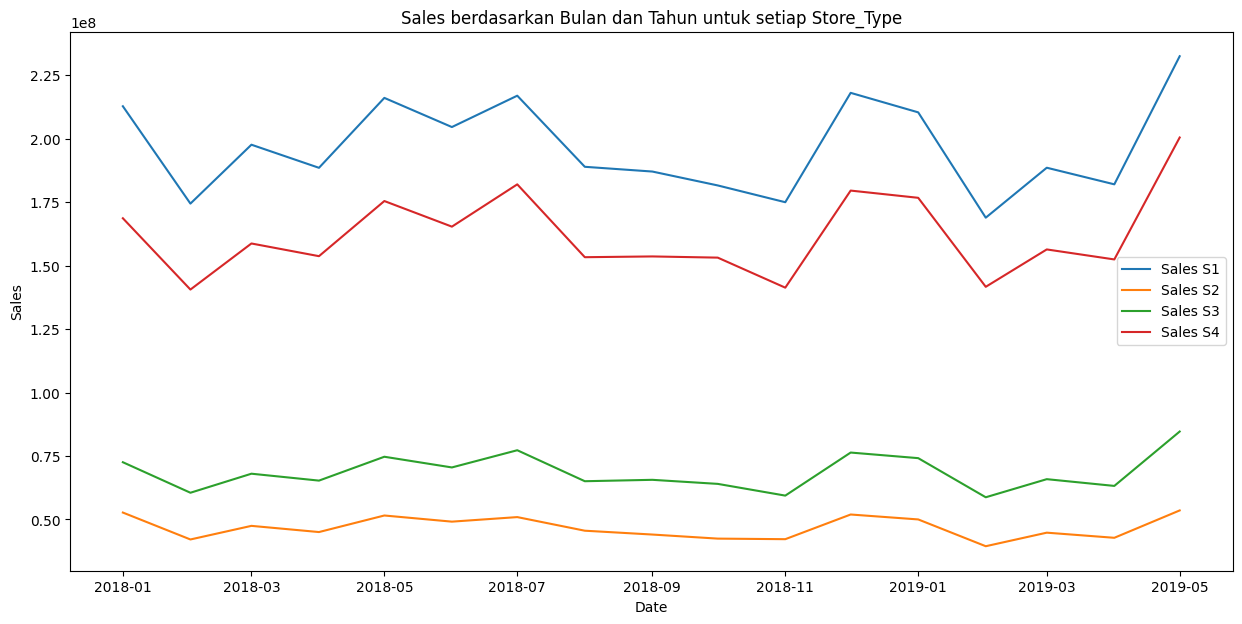

In [63]:
# Mengubah kolom 'Date' menjadi datetime dan ekstrak bulan dan tahun
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Mengelompokkan data berdasarkan 'YearMonth' dan 'Store_Type', dan menghitung total Sales dan #Order
grouped = df.groupby(['YearMonth', 'Store_Type']).agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Mengubah 'YearMonth' kembali menjadi format datetime
grouped['YearMonth'] = grouped['YearMonth'].dt.to_timestamp()

# Mendapatkan daftar unique 'Store_Type'
store_types = grouped['Store_Type'].unique()

# Membuat plot untuk setiap 'Store_Type'
fig, ax = plt.subplots(figsize=(15, 7))

for store_type in store_types:
    temp_df = grouped[grouped['Store_Type'] == store_type]
    ax.plot(temp_df['YearMonth'], temp_df['Sales'], label=f'Sales {store_type}')

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()

plt.title('Sales berdasarkan Bulan dan Tahun untuk setiap Store_Type')
plt.show()

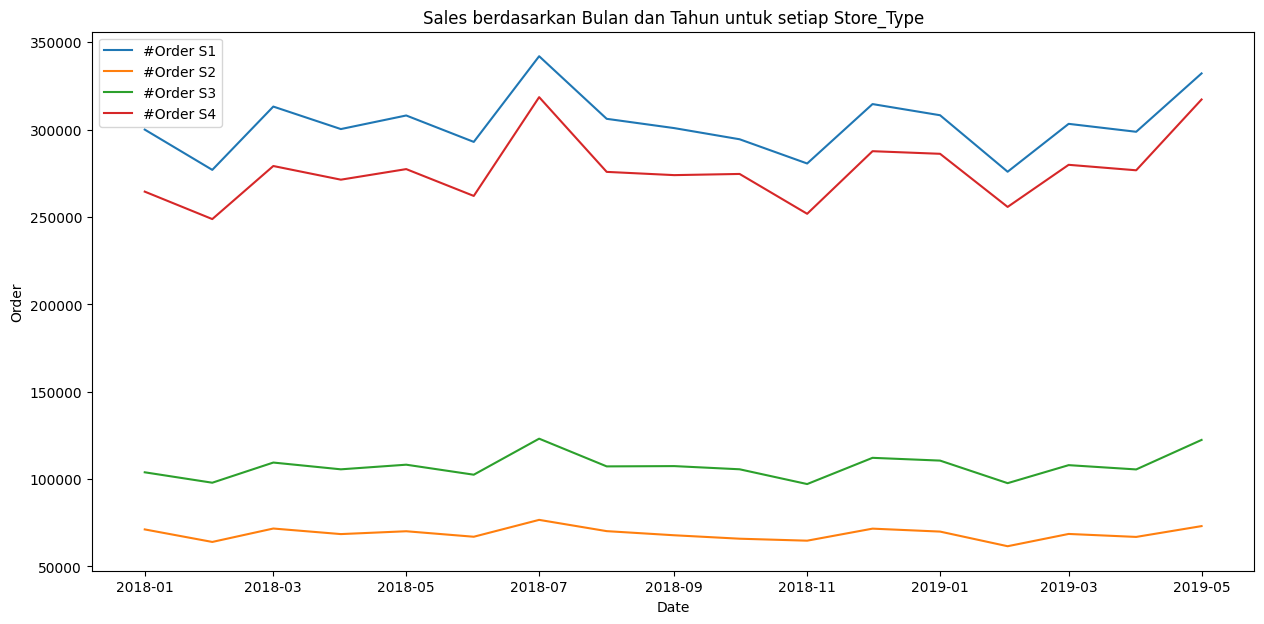

In [64]:
# Mengubah kolom 'Date' menjadi datetime dan ekstrak bulan dan tahun
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Mengelompokkan data berdasarkan 'YearMonth' dan 'Store_Type', dan menghitung total Sales dan #Order
grouped = df.groupby(['YearMonth', 'Store_Type']).agg({'Sales':'sum', '#Order':'sum'}).reset_index()

# Mengubah 'YearMonth' kembali menjadi format datetime
grouped['YearMonth'] = grouped['YearMonth'].dt.to_timestamp()

# Mendapatkan daftar unique 'Store_Type'
store_types = grouped['Store_Type'].unique()

# Membuat plot untuk setiap 'Store_Type'
fig, ax = plt.subplots(figsize=(15, 7))

for store_type in store_types:
    temp_df = grouped[grouped['Store_Type'] == store_type]
    ax.plot(temp_df['YearMonth'], temp_df['#Order'], label=f'#Order {store_type}')

ax.set_xlabel('Date')
ax.set_ylabel('Order')
ax.legend()

plt.title('Sales berdasarkan Bulan dan Tahun untuk setiap Store_Type')
plt.show()